<a href="https://colab.research.google.com/github/mark-bell-tna/ComputationalAccess/blob/main/Web_Design_changes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import requests;      #used for connecting to the API
import sys
from time import sleep
from math import log
import os
from urllib.request import urlopen
import re
from operator import itemgetter
from matplotlib import pyplot as plt
import time
import timeit
import numpy as np

In [1]:
if 'google.colab' in str(get_ipython()):
    environment = "Colab"
elif 'BINDER_SERVICE_HOST' in os.environ:
    environment = "Binder"
else:
    environment = "Unknown"

In [4]:
if environment == "Colab":
    !git clone https://github.com/mark-bell-tna/ComputationalAccess.git
    sys.path.insert(0, 'ComputationalAccess')
    github_data = "ComputationalAccess/Data/"
    os.listdir(github_data)
    # Connect to gdrive
    from google.colab import drive
    drive.mount('/content/gdrive')
    data_folder = "/content/gdrive/My Drive/Data/"
else:
    github_data = "Data/"
    data_folder = "Data/"

fatal: destination path 'ComputationalAccess' already exists and is not an empty directory.
Mounted at /content/gdrive


In [6]:
os.listdir(data_folder)

['atoz_index.txt', 'www.northumberlandnationalpark.org.uk']

In [127]:
mydata = data_folder + "www.northumberlandnationalpark.org.uk"
mydata = data_folder + "www.ukri.org"
mydata = data_folder + "www.bis.gov.uk.ukspaceagency"
myfile = open(mydata, "r")
#3a79714466b44560703982cacc7df755|20170302101357|171|171
hash_data = []
for row in myfile:
    fields = row[:-1].split("|")
    fields[1] = np.datetime64("-".join([fields[1][:4],fields[1][4:6],fields[1][6:8]]),'D')
    fields[2] = int(fields[2])
    fields[3] = int(fields[3])
    fields.append(fields[2]/fields[3])
    if fields[3] < 5 or fields[4] < 0.2:
      continue
    hash_data.append(fields)
myfile.close()

[['1799ff8d', [numpy.datetime64('2012-08-17'), numpy.datetime64('2013-11-04')]], ['d9ab38bd', [numpy.datetime64('2011-03-14'), numpy.datetime64('2013-11-04')]], ['3e133e6e', [numpy.datetime64('2011-03-14'), numpy.datetime64('2012-07-08')]]]
('1799ff8d', 'd9ab38bd', '3e133e6e')
[numpy.datetime64('2012-08-17'), numpy.datetime64('2011-03-14'), numpy.datetime64('2011-03-14')]
<class 'list'> 3 <class 'list'> 3 <class 'tuple'> 3
1799ff8d 2012-08-17 2013-11-04


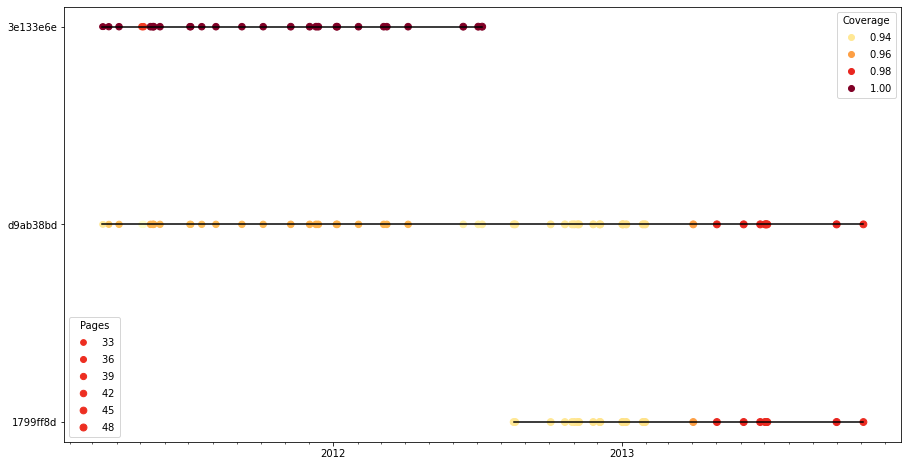

In [128]:
# Draw chart of earliest and latest snapshots by site
# Red for earliest, blue for latest
import matplotlib.dates as mdates

hash_data.sort(key=itemgetter(1), reverse=True)
hashes,snapshots,hash_counts,page_counts, pct = zip(*hash_data)
hashes = [h[:8] for h in hashes]
hash_summary = {}
for i in range(len(hashes)):
    this_snap = snapshots[i]
    this_hash = hashes[i]
    if this_hash in hash_summary:
        this_sum = hash_summary[this_hash]
    else:
        this_sum = [this_snap, this_snap]
    this_sum = [min(this_sum[0], this_snap), max(this_sum[1], this_snap)]
    hash_summary[this_hash] = this_sum

hash_items = [[k,v] for k,v in hash_summary.items()]
print(hash_items)
hash_keys, hash_dates = zip(*hash_items)
hash_keys = tuple(hash_keys)
print(hash_keys)
print([i for (i,j) in hash_dates])
min_dates = [i for (i,j) in hash_dates]
max_dates = [j for (i,j) in hash_dates]
print(type(min_dates), len(min_dates), type(max_dates), len(max_dates), type(hash_keys), len(hash_keys))
print(hash_keys[0],min_dates[0],max_dates[0])

#x = [n for n in range(len(x_labels))]
#d = [h for h in zip(y,z)]
#y = [i for (i,j) in d]
#z = [j for (i,j) in d]
#plt.figure(figsize=(10,8))
fig, ax = plt.subplots(figsize=(15,8))
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

scat = ax.scatter(snapshots, hashes, s = hash_counts, c = pct, cmap = 'YlOrRd')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(years_fmt)

for i in range(len(hash_keys)):
    ax.plot((min_dates[i], max_dates[i]), (hash_keys[i], hash_keys[i]),c='black')

#plt.plot(z, x, 'bo', markersize = 4)
#plt.plot(([i for (i,j) in d], [j for (i,j) in d]),(x,x),c='black')
legend1 = ax.legend(*scat.legend_elements(num=5),
                    loc="upper right", title="Coverage")
ax.add_artist(legend1)
kw = dict(prop="sizes", num=7, color=scat.cmap(0.7)) #,  func=lambda s: s)
legend2 = ax.legend(*scat.legend_elements(**kw),
                    loc="lower left", title="Pages")
#plt.xticks(rotation=45, ticks=[int(str(y) + '0101') for y in range(2010,2019)],
#           labels = [str(y) for y in range(2010,2019)])
#plt.yticks(ticks=x,labels = x_labels,fontsize=8)
plt.show()